## Import Library

In [7]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# read data
data = datasets.load_boston()

NameError: name 'datasets' is not defined

In [6]:
df =  pd.DataFrame(data.data, columns=data.feature_names)

# add target
df['target'] = data.target

df.head()

NameError: name 'data' is not defined

In [ ]:
df.shape

## 1. visualization method

### Box-plot

In [3]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

NameError: name 'df' is not defined

### Scatter plot

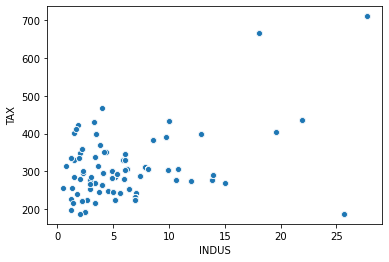

In [141]:
sns.scatterplot(df['INDUS'], df['TAX'])
plt.show()

## 2. Statistical method

### z-score

In [104]:
from scipy import stats

In [118]:
# calculate z score
z = np.abs(stats.zscore(df))

print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [122]:
# any data point with z-score greater then 3 is an outlier
threshold = 3
print(np.where(z>3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [125]:
# 55 is the row no and 1 is the column no
print(z[55][1])

3.375038763517294


## Remove outliers (z-score)

In [143]:
new_df = df[(z < 3).all(axis=1)]

(415, 14)

In [146]:
# check the shape of new and old df
df.shape, new_df.shape

((506, 14), (415, 14))

### IQR Score

In [180]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

# calculate IQR
IQR = q3 - q1

print(IQR)

CRIM         3.595038
ZN          12.500000
INDUS       12.910000
CHAS         0.000000
NOX          0.175000
RM           0.738000
AGE         49.050000
DIS          3.088250
RAD         20.000000
TAX        387.000000
PTRATIO      2.800000
B           20.847500
LSTAT       10.005000
target       7.975000
dtype: float64


In [10]:
# find the outliers
iqr_outlier = (df <  (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))

print(iqr_outlier)

NameError: name 'df' is not defined

## Remove outliers (IQR score)

In [9]:
# remove outlier
new_df_2 = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR))).any(axis=1)]

NameError: name 'dataset' is not defined

In [183]:
new_df_2.shape

(268, 14)